# BBM 469 : Veri Yoğunluklu Uygulamalar Laboratuvarı
## Veri Bilimi Bitirme Projesi
### Ay Evreleri Kripto Para Birimlerini etkiler mi, etkilemez mi?
#### Ay evrelerinin "kripto para birimleri" üzerinde bazı etkilerinin olduğu son zamanlarda sosyal medya gündeminde yer alıyor ancak bununla ilgili bir araştırma yok, sadece bir farkındalık olarak nitelendiriliyor. Bu projedeki amacımız, ayın farklı evrelerinin kripto para birimlerini etkileyip etkilemediğinin istatistiksel olarak araştırılmasıdır.
### Uğurcan ERDOĞAN - Alperen Berk IŞILDAR

## İçerik

[PROBLEM TANIMI](#problem)
[Veri Toplama](#veri_toplama)
[Veri Ön İşleme](#veri_on_isleme)
[Veri Keşfi](#veri_kesfi)
[Özellik Mühendisliği](#ozellik_muhendisligi)
[Analiz](#analiz)
[Sonuç](#sonuc)
[REFERANSLAR](#referanslar)

### PROBLEM TANIMI : <a class="anchor" id="problem"></a>


Gann Analizi teknikleri çoğu yatırımcı tarafından kripto ve finansal analizde kullanılmaktadır. Ancak belli bir gruba göre bu analiz tekniğinde çok fazla hurafe ve tutarsız ölçüm yöntemleri bulunmaktadır. Bunlar arasında bir yöntem oldukça dikkat çekicidir. İnsanların davranışlarının ayın hareketlerine ve döngülerine göre değiştiği fikrine dayanan bu analiz türünde belli kurallar vardır ve borsada sonuçlarını görmek mümkündür. Astrolojik temelli bu inanışa göre dolunaydan sonraki günden yeni aya kadar piyasalarda bir artış olur. Aksine, yeni ayın ertesi gününden dolunaya kadar borsada düşüş gözlemlenebilir. Yarım ayların da düzeltme veya tamamlama görevini üstlenebileceğinden bahsedilmektedir.


Bu projemizde günümüzün yükselen trendlerinden biri olan kripto borsalarını inceleyeceğiz ve en baskın kripto para olan BTC'de durumun böyle olup olmadığını inceleyeceğiz. 1 BTC'nin dolar karşılığı olan BTCUSDT ticker üzerinde ilerleyeceğimiz bu projede, günlük tarihsel verileri anlamlı hale getireceğiz ve bu anlamlı veride ay döngülerinin bahsedildiği gibi etkili olup olmadığını yorumlayacağız.

In [28]:
# Binance borsasında aldığımız API anahtarlarını belirledik.
api_anahtari = 'hogz7OSaxUmgkrDDpCAYnbSfujwXdOanXhqDcTjj5H4uaU3Ik8Nf89rjFXRB5h5Q'
gizli_anahtar = '6LN48p3vTAI0631S7WUpDrzWoOnDHlMMAaKvar7LA3gqn4zb4x0nB2Hce6uyaCwb'

In [29]:
# Veri bilimi görevleri için gerekli paketleri indiriyoruz.
!pip install python-binance pandas mplfinance openpyxl statsmodels

In [30]:
# İndirilen paketleri içe aktarma işlemi.
from binance import Client, ThreadedWebsocketManager, ThreadedDepthCacheManager
import pandas as pd

### 1- Veri Toplama <a class="anchor" id="veri_toplama"></a>
Bu adımda, 1 günlük aralıklarla Binance API aracılığıyla BTCUSDT kaydı için geçmiş verileri getirdik. 11 Ocak 2020 ile 19 Aralık 2021 arasındaki 2 yıllık veriler, Ay evreleri için elimizdeki verilerin tam karşılığı olacaktır.

In [31]:
istemci = Client(api_anahtari, gizli_anahtar)
tarihsel_bilgiler = istemci.get_historical_klines('BTCUSDT', Client.KLINE_INTERVAL_1DAY, '11 Jan 2020', '19 Dec 2021')
tarihsel_bilgiler

#  Veri içeriği:
#  [
#   [
#     1499040000000,      // Açılış tarihi
#     "0.01634790",       // Açılış fiyatı
#     "0.80000000",       // En yüksek fiyat
#     "0.01575800",       // En düşük fiyat
#     "0.01577100",       // Kapanış fiyatı
#     "148976.11427815",  // İşlem hacmi
#     1499644799999,      // Kapanış tarihi
#     "2434.19055334",    // Teklif varlık hacmi
#     308,                // İşlem sayısı
#     "1756.87402397",    // Alıcı satın alma temel varlık hacmi
#     "28.46694368",      // Alıcı satın alma teklifi varlık hacmi
#     "17928899.62484339" // yoksayınız.
#   ]
# ]

[[1578700800000,
  '8198.86000000',
  '8286.34000000',
  '8003.16000000',
  '8020.01000000',
  '54810.03266700',
  1578787199999,
  '445034349.56470204',
  469131,
  '27916.12497400',
  '226716001.44288607',
  '0'],
 [1578787200000,
  '8020.01000000',
  '8197.00000000',
  '7960.00000000',
  '8184.98000000',
  '38131.49433600',
  1578873599999,
  '309351920.45885002',
  350662,
  '19718.54109600',
  '159972663.99291870',
  '0'],
 [1578873600000,
  '8184.97000000',
  '8196.00000000',
  '8055.89000000',
  '8110.34000000',
  '31159.75568300',
  1578959999999,
  '252656965.35815013',
  289144,
  '15215.22650100',
  '123407351.91807934',
  '0'],
 [1578960000000,
  '8110.34000000',
  '8880.00000000',
  '8105.54000000',
  '8810.01000000',
  '120399.12674200',
  1579046399999,
  '1032735180.86587384',
  915328,
  '62492.09667600',
  '536081638.05418570',
  '0'],
 [1579046400000,
  '8814.64000000',
  '8916.48000000',
  '8564.00000000',
  '8821.41000000',
  '84816.29760600',
  1579132799999,
  '7

In [32]:
# Veri çerçevesindeki ham verilerimiz.
tarihsel_veri_cercevesi = pd.DataFrame(tarihsel_bilgiler)
gosterim_veri_cercevesi = tarihsel_veri_cercevesi.copy(deep=False)
gosterim_veri_cercevesi.columns = ['Open Time', 'Open', 'High', 'Low', 'Close', 'Volume', 'Close Time', 'Quote Asset Volume',
                   'Number of Trades', 'TB Base Volume', 'TB Quote Volume', 'Ignore']
tarihsel_veri_cercevesi.head()

,0,1,2,3,4,5,6,7,8,9,10,11
0,1578700800000,8198.86000000,8286.34000000,8003.16000000,8020.01000000,54810.03266700,1578787199999,445034349.56470204,469131,27916.12497400,226716001.44288607,0
1,1578787200000,8020.01000000,8197.00000000,7960.00000000,8184.98000000,38131.49433600,1578873599999,309351920.45885002,350662,19718.54109600,159972663.99291870,0
2,1578873600000,8184.97000000,8196.00000000,8055.89000000,8110.34000000,31159.75568300,1578959999999,252656965.35815013,289144,15215.22650100,123407351.91807934,0
3,1578960000000,8110.34000000,8880.00000000,8105.54000000,8810.01000000,120399.12674200,1579046399999,1032735180.86587384,915328,62492.09667600,536081638.05418570,0
4,1579046400000,8814.64000000,8916.48000000,8564.00000000,8821.41000000,84816.29760600,1579132799999,743712237.27908164,764048,42493.55102600,372770745.17929917,0


Not: Gösterim Veri Çerçevesi'ni, sadece BTC grafiğinin gösteriminde kullanacağız. İlgili çizim fonksiyonunun Türkçe karakter uyumsuzluğu sebebiyle geçici olarak bu çerçeveye ihtiyaç duyduk.

In [33]:
# Önceden işlenmiş Ay evreleri tablosunun okunması.
evreler_veri_cercevesi = pd.read_excel(io="phase_dates.xlsx")
evreler_veri_cercevesi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 3 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Phase's Next Date        48 non-null     datetime64[ns]
 1   Next Phase's First Date  48 non-null     datetime64[ns]
 2   Starting Phase Name      48 non-null     object        
dtypes: datetime64[ns](2), object(1)
memory usage: 1.2+ KB


### 2- Veri Ön İşleme <a class="anchor" id="veri_on_isleme"></a>
Bu adımda elde ettiğimiz verileri anlamlı ve işlenebilir hale getirdik.

In [34]:
# Her özellik için sütun adları.
tarihsel_veri_cercevesi.columns = ['Açılış Tarihi', 'Açılış Fiyatı', 'En Yüksek Fiyat', 'En Düşük Fiyat', 'Kapanış Fiyatı', 'İşlem Hacmi', 'Kapanış Tarihi', 'Teklif Varlık Hacmi',
                   'İşlem Sayısı', 'ASA Temel Varlık Hacmi', 'ASA Teklifi Varlık Hacmi', 'Yoksayınız']

In [35]:
# Verilerimizin boyutu.
print("Satır sayısı : {0}".format(tarihsel_veri_cercevesi.shape[0]))
print("Sütun sayısı : {0}".format(tarihsel_veri_cercevesi.shape[1]))

Satır sayısı : 709
Sütun sayısı : 12


In [36]:
# Her sütun için özellik tipleri.
tarihsel_veri_cercevesi.dtypes

Açılış Tarihi                int64
Açılış Fiyatı               object
En Yüksek Fiyat             object
En Düşük Fiyat              object
Kapanış Fiyatı              object
İşlem Hacmi                 object
Kapanış Tarihi               int64
Teklif Varlık Hacmi         object
İşlem Sayısı                 int64
ASA Temel Varlık Hacmi      object
ASA Teklifi Varlık Hacmi    object
Yoksayınız                  object
dtype: object

In [37]:
# Açılış ve kapanış zamanı satırı verilerini anlamlı tarih-saat nesnesine dönüştürme işlemi. Artık tarihleri kolayca karşılaştırabiliriz.
tarihsel_veri_cercevesi['Açılış Tarihi'] = pd.to_datetime(tarihsel_veri_cercevesi['Açılış Tarihi'] / 1000, unit='s').dt.normalize()
tarihsel_veri_cercevesi['Kapanış Tarihi'] = pd.to_datetime(tarihsel_veri_cercevesi['Kapanış Tarihi'] / 1000, unit='s').dt.normalize()
gosterim_veri_cercevesi['Open Time'] = pd.to_datetime(gosterim_veri_cercevesi['Open Time'] / 1000, unit='s').dt.normalize()
gosterim_veri_cercevesi['Close Time'] = pd.to_datetime(gosterim_veri_cercevesi['Close Time'] / 1000, unit='s').dt.normalize()

In [38]:
# Ön işleme için sayısal olmayan sütunları belirledik.
sayisal_sutunlar = ['Açılış Fiyatı', 'En Yüksek Fiyat', 'En Düşük Fiyat', 'Kapanış Fiyatı', 'İşlem Hacmi', 'Teklif Varlık Hacmi', 'ASA Temel Varlık Hacmi', 'ASA Teklifi Varlık Hacmi']
sayisal_sutunlar_gosterim = ['Open', 'High', 'Low', 'Close', 'Volume', 'Quote Asset Volume', 'TB Base Volume', 'TB Quote Volume']

In [39]:
# Sayısal olmayan sütunları sayısal tipe çevirdik.
tarihsel_veri_cercevesi[sayisal_sutunlar] = tarihsel_veri_cercevesi[sayisal_sutunlar].apply(pd.to_numeric, axis=1)
gosterim_veri_cercevesi[sayisal_sutunlar_gosterim] = gosterim_veri_cercevesi[sayisal_sutunlar_gosterim].apply(pd.to_numeric, axis=1)

### 3- Veri Keşfi <a class="anchor" id="veri_kesfi"></a>
Veri ön-işlemeden sonra keşifsel bilgiler ve özetleri.

In [40]:
# Önceden işlenmiş veri çerçevemiz.
tarihsel_veri_cercevesi.head()

,Açılış Tarihi,Açılış Fiyatı,En Yüksek Fiyat,En Düşük Fiyat,Kapanış Fiyatı,İşlem Hacmi,Kapanış Tarihi,Teklif Varlık Hacmi,İşlem Sayısı,ASA Temel Varlık Hacmi,ASA Teklifi Varlık Hacmi,Yoksayınız
0,2020-01-11,8198.86,8286.34,8003.16,8020.01,54810.032667,2020-01-11,4.450343e+08,469131,27916.124974,2.267160e+08,0
1,2020-01-12,8020.01,8197.00,7960.00,8184.98,38131.494336,2020-01-12,3.093519e+08,350662,19718.541096,1.599727e+08,0
2,2020-01-13,8184.97,8196.00,8055.89,8110.34,31159.755683,2020-01-13,2.526570e+08,289144,15215.226501,1.234074e+08,0
3,2020-01-14,8110.34,8880.00,8105.54,8810.01,120399.126742,2020-01-14,1.032735e+09,915328,62492.096676,5.360816e+08,0
4,2020-01-15,8814.64,8916.48,8564.00,8821.41,84816.297606,2020-01-15,7.437122e+08,764048,42493.551026,3.727707e+08,0


In [41]:
# Sütunların tipleri.
tarihsel_veri_cercevesi.dtypes

Açılış Tarihi               datetime64[ns]
Açılış Fiyatı                      float64
En Yüksek Fiyat                    float64
En Düşük Fiyat                     float64
Kapanış Fiyatı                     float64
İşlem Hacmi                        float64
Kapanış Tarihi              datetime64[ns]
Teklif Varlık Hacmi                float64
İşlem Sayısı                         int64
ASA Temel Varlık Hacmi             float64
ASA Teklifi Varlık Hacmi           float64
Yoksayınız                          object
dtype: object

In [42]:
# Veri ön işlemesinden sonraki haliyle veri çerçevesi için açıklayıcı bilgilerin yer aldığı tablo.
tarihsel_veri_cercevesi.describe()

,Açılış Fiyatı,En Yüksek Fiyat,En Düşük Fiyat,Kapanış Fiyatı,İşlem Hacmi,Teklif Varlık Hacmi,İşlem Sayısı,ASA Temel Varlık Hacmi,ASA Teklifi Varlık Hacmi
count,709.000000,709.000000,709.000000,709.000000,709.000000,7.090000e+02,7.090000e+02,709.000000,7.090000e+02
mean,29150.023089,30020.584612,28166.035839,29204.498787,70904.863478,1.998933e+09,1.365362e+06,34704.831667,9.824350e+08
std,19637.758836,20205.880981,18958.474264,19633.089705,39264.712417,1.640751e+09,7.576459e+05,19094.105186,8.048288e+08
min,4800.010000,5365.420000,3782.130000,4800.000000,22298.221341,2.066281e+08,2.831180e+05,10318.024614,9.992165e+07
25%,9772.440000,9950.000000,9550.210000,9775.530000,46085.254351,6.156648e+08,7.505160e+05,22545.243750,2.953515e+08
50%,27385.000000,28996.000000,27320.000000,28875.540000,60951.672986,1.594996e+09,1.220555e+06,29609.994698,7.873244e+08
75%,47674.010000,49156.000000,46406.910000,47674.010000,84363.679763,2.958081e+09,1.814051e+06,41221.961009,1.466279e+09
max,67525.820000,69000.000000,66222.400000,67525.830000,402201.673764,1.347769e+10,6.331062e+06,197511.954273,6.410033e+09


In [43]:
# Veri çerçevesi hakkında diğer bilgiler.
tarihsel_veri_cercevesi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 709 entries, 0 to 708
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Açılış Tarihi             709 non-null    datetime64[ns]
 1   Açılış Fiyatı             709 non-null    float64       
 2   En Yüksek Fiyat           709 non-null    float64       
 3   En Düşük Fiyat            709 non-null    float64       
 4   Kapanış Fiyatı            709 non-null    float64       
 5   İşlem Hacmi               709 non-null    float64       
 6   Kapanış Tarihi            709 non-null    datetime64[ns]
 7   Teklif Varlık Hacmi       709 non-null    float64       
 8   İşlem Sayısı              709 non-null    int64         
 9   ASA Temel Varlık Hacmi    709 non-null    float64       
 10  ASA Teklifi Varlık Hacmi  709 non-null    float64       
 11  Yoksayınız                709 non-null    object        
dtypes: datetime64[ns](2), 

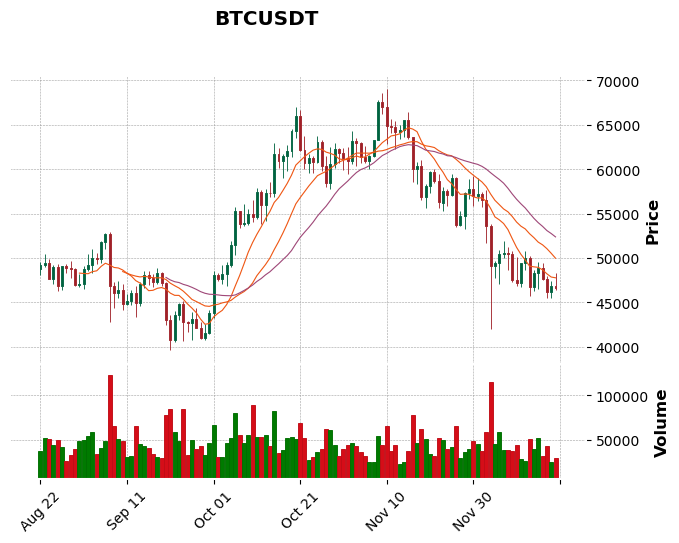

In [44]:
# BTCUSDT grafiğini göstermek için mplfinance(matplotlib-finance) paketini içe aktarma.
import mplfinance as mpf

mpf.plot(gosterim_veri_cercevesi.set_index('Close Time').tail(120),
         type='candle', style='charles',
         volume=True,
         title='BTCUSDT',
         mav=(10, 20, 30))

### 4- Özellik Mühendisliği <a class="anchor" id="ozellik_muhendisligi"></a>
Bu adımda ihtiyacımız olmayan sütunları kaldırdık. Sadece açılış tarihi, kapanış tarihi ve açılış-kapanış fiyatları bizim için geçerli olacaktır. Bu sayede ilgili 2 haftalık aralıklarla kapanış fiyatı-açılış fiyatı formülü ile artış/azalış durumunu tespit edebileceğiz.

In [45]:
# BTC veri çerçevesinin gereksiz sütunları.
ozet_veri_cercevesi = tarihsel_veri_cercevesi.drop(['En Yüksek Fiyat', 'En Düşük Fiyat', 'İşlem Hacmi', 'Teklif Varlık Hacmi', 'İşlem Sayısı', 'ASA Temel Varlık Hacmi', 'ASA Teklifi Varlık Hacmi', 'Yoksayınız'], axis=1)
ozet_veri_cercevesi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 709 entries, 0 to 708
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Açılış Tarihi   709 non-null    datetime64[ns]
 1   Açılış Fiyatı   709 non-null    float64       
 2   Kapanış Fiyatı  709 non-null    float64       
 3   Kapanış Tarihi  709 non-null    datetime64[ns]
dtypes: datetime64[ns](2), float64(2)
memory usage: 22.3 KB


In [46]:
# Ay evreleri veri çerçevesini filtreleme ve evrelerine göre iki farklı grup oluşturma.
# Her ay evresi için tarih aralıklarının seçilmesi ve ayrılması.
dolunay_evresi_verileri = evreler_veri_cercevesi[evreler_veri_cercevesi["Starting Phase Name"] == "Full Moon"].reset_index(drop=True)
yeniay_evresi_verileri = evreler_veri_cercevesi[evreler_veri_cercevesi["Starting Phase Name"] == "New Moon"].reset_index(drop=True)

print("Dolunay evresindeki verilerin bulunduğu grup")
print(dolunay_evresi_verileri.head())
print()
print("Yeni ay evresindeki verilerin bulunduğu grup")
print(yeniay_evresi_verileri.head())

Dolunay evresindeki verilerin bulunduğu grup
  Phase's Next Date Next Phase's First Date Starting Phase Name
0        2020-01-11              2020-01-25           Full Moon
1        2020-02-10              2020-02-23           Full Moon
2        2020-03-10              2020-03-24           Full Moon
3        2020-04-09              2020-04-23           Full Moon
4        2020-05-08              2020-05-22           Full Moon

Yeni ay evresindeki verilerin bulunduğu grup
  Phase's Next Date Next Phase's First Date Starting Phase Name
0        2020-01-26              2020-02-09            New Moon
1        2020-02-24              2020-03-09            New Moon
2        2020-03-25              2020-04-08            New Moon
3        2020-04-24              2020-05-07            New Moon
4        2020-05-23              2020-06-05            New Moon


### 5- Analiz <a class="anchor" id="analiz"></a>

In [47]:
# İlgili bilgileri tutmak ve sütunlara dönüştürmek için oluşturduğumuz listeler.
acilis_fiyatlari_listesi = []
kapanis_fiyatlari_listesi = []
acilis_tarihleri = []
kapanis_tarihleri = []

# BTC Fiyatı veri çerçevesinden tüm dolunay evresi aralıklarını ve diğer bilgileri seçme.
for i in range(dolunay_evresi_verileri.shape[0]):
    for j in range(ozet_veri_cercevesi.shape[0]):
        if dolunay_evresi_verileri.iloc[i]["Phase\'s Next Date"] == ozet_veri_cercevesi.iloc[j]["Açılış Tarihi"]:
            acilis_fiyati = ozet_veri_cercevesi.iloc[j]["Açılış Fiyatı"]
            acilis_fiyatlari_listesi.append(acilis_fiyati)
            acilis_tarihleri.append(dolunay_evresi_verileri.iloc[i]["Phase\'s Next Date"])

for i in range(dolunay_evresi_verileri.shape[0]):
    for j in range(ozet_veri_cercevesi.shape[0]):
        if dolunay_evresi_verileri.iloc[i]["Next Phase\'s First Date"] == ozet_veri_cercevesi.iloc[j]["Kapanış Tarihi"]:
            kapanis_fiyati = ozet_veri_cercevesi.iloc[j]["Kapanış Fiyatı"]
            kapanis_fiyatlari_listesi.append(kapanis_fiyati)
            kapanis_tarihleri.append(dolunay_evresi_verileri.iloc[i]["Next Phase\'s First Date"])

In [48]:
# Artış görülmesi beklenen tarih aralıklarının yer aldığı veri çerçevesini, doldurduğumuz listeler ile oluşturma.
artmasi_beklenenlerin_veri_cercevesi = pd.DataFrame([acilis_tarihleri,kapanis_tarihleri,acilis_fiyatlari_listesi,kapanis_fiyatlari_listesi]).transpose()
artmasi_beklenenlerin_veri_cercevesi.columns=['Açılış Tarihi','Kapanış Tarihi','Açılış Fiyatı','Kapanış Fiyatı']

# Çıkarma işlemi ile fiyat değişim tutarının hesaplanması.
artmasi_beklenenlerin_veri_cercevesi = pd.concat([artmasi_beklenenlerin_veri_cercevesi, artmasi_beklenenlerin_veri_cercevesi['Kapanış Fiyatı']-artmasi_beklenenlerin_veri_cercevesi['Açılış Fiyatı']], axis=1, join='inner')

# Sütün isimlerini düzenleme.
artmasi_beklenenlerin_veri_cercevesi.columns=['Açılış Tarihi','Kapanış Tarihi','Açılış Fiyatı','Kapanış Fiyatı', 'Fiyat Değişim Miktarı']

artmasi_beklenenlerin_veri_cercevesi

,Açılış Tarihi,Kapanış Tarihi,Açılış Fiyatı,Kapanış Fiyatı,Fiyat Değişim Miktarı
0,2020-01-11,2020-01-25,8198.86,8340.58,141.72
1,2020-02-10,2020-02-23,10151.72,9936.4,-215.32
2,2020-03-10,2020-03-24,7929.87,6744.72,-1185.15
3,2020-04-09,2020-04-23,7360.26,7482.39,122.13
4,2020-05-08,2020-05-22,9986.3,9170.0,-816.3
5,2020-06-06,2020-06-21,9621.17,9294.69,-326.48
6,2020-07-06,2020-07-20,9069.41,9160.78,91.37
7,2020-08-04,2020-08-19,11219.68,11754.59,534.91
8,2020-09-03,2020-09-17,11388.54,10939.99,-448.55
9,2020-10-03,2020-10-16,10570.4,11319.32,748.92


In [49]:
# İlgili bilgileri tutmak ve sütunlara dönüştürmek için oluşturduğumuz listeler.
acilis_fiyatlari_listesi = []
kapanis_fiyatlari_listesi = []
acilis_tarihleri = []
kapanis_tarihleri = []

# BTC Fiyatı veri çerçevesinden tüm yeni ay evresi aralıklarını ve diğer bilgileri seçme.
for i in range(yeniay_evresi_verileri.shape[0]):
    for j in range(ozet_veri_cercevesi.shape[0]):
        if yeniay_evresi_verileri.iloc[i]["Phase\'s Next Date"] == ozet_veri_cercevesi.iloc[j]["Açılış Tarihi"]:
            acilis_fiyati = ozet_veri_cercevesi.iloc[j]["Açılış Fiyatı"]
            acilis_fiyatlari_listesi.append(acilis_fiyati)
            acilis_tarihleri.append(yeniay_evresi_verileri.iloc[i]["Phase\'s Next Date"])

for i in range(yeniay_evresi_verileri.shape[0]):
    for j in range(ozet_veri_cercevesi.shape[0]):
        if yeniay_evresi_verileri.iloc[i]["Next Phase\'s First Date"] == ozet_veri_cercevesi.iloc[j]["Kapanış Tarihi"]:
            kapanis_fiyati = ozet_veri_cercevesi.iloc[j]["Kapanış Fiyatı"]
            kapanis_fiyatlari_listesi.append(kapanis_fiyati)
            kapanis_tarihleri.append(yeniay_evresi_verileri.iloc[i]["Next Phase\'s First Date"])

In [50]:
# Azalış görülmesi beklenen tarih aralıklarının yer aldığı veri çerçevesini, doldurduğumuz listeler ile oluşturma.
azalmasi_beklenenlerin_veri_cercevesi = pd.DataFrame([acilis_tarihleri,kapanis_tarihleri,acilis_fiyatlari_listesi,kapanis_fiyatlari_listesi]).transpose()
azalmasi_beklenenlerin_veri_cercevesi.columns=['Açılış Tarihi','Kapanış Tarihi','Açılış Fiyatı','Kapanış Fiyatı']

# Çıkarma işlemi ile fiyat değişim tutarının hesaplanması.
azalmasi_beklenenlerin_veri_cercevesi = pd.concat([azalmasi_beklenenlerin_veri_cercevesi, azalmasi_beklenenlerin_veri_cercevesi['Kapanış Fiyatı']-azalmasi_beklenenlerin_veri_cercevesi['Açılış Fiyatı']], axis=1, join='inner')

# Sütün isimlerini düzenleme.
azalmasi_beklenenlerin_veri_cercevesi.columns=['Açılış Tarihi','Kapanış Tarihi','Açılış Fiyatı','Kapanış Fiyatı', 'Fiyat Değişim Miktarı']

azalmasi_beklenenlerin_veri_cercevesi

,Açılış Tarihi,Kapanış Tarihi,Açılış Fiyatı,Kapanış Fiyatı,Fiyat Değişim Miktarı
0,2020-01-26,2020-02-09,8340.01,10151.75,1811.74
1,2020-02-24,2020-03-09,9936.4,7929.87,-2006.53
2,2020-03-25,2020-04-08,6744.69,7361.28,616.59
3,2020-04-24,2020-05-07,7483.96,9986.4,2502.44
4,2020-05-23,2020-06-05,9170.0,9621.16,451.16
5,2020-06-22,2020-07-05,9294.69,9069.41,-225.28
6,2020-07-21,2020-08-03,9160.78,11219.81,2059.03
7,2020-08-20,2020-09-02,11754.38,11388.54,-365.84
8,2020-09-18,2020-10-02,10940.0,10570.4,-369.6
9,2020-10-17,2020-10-31,11319.24,13791.0,2471.76


Durum listesindeki 1 değer değişimin pozitif olduğunu yani arttığını gösterir. 0'lar değişimin negatif olduğunu, yani bir azalma olduğunu gösterir.

In [51]:
# Fiyat değişim tutarının işaretine göre artış/azalış durumunu belirliyoruz. (Fiyat değişiminin her zaman sıfırdan farklı olduğunu varsayıyoruz. Çünkü bu durum çok düşük bir ihtimal.)
durum_listesi = []
for i in range(artmasi_beklenenlerin_veri_cercevesi.shape[0]):
    if artmasi_beklenenlerin_veri_cercevesi.iloc[i]["Fiyat Değişim Miktarı"] > 0:
        durum_listesi.append(1)
    else:
        durum_listesi.append(0)

In [52]:
# Birinci grup ve durum listesini yan yana birleştirme işlemi.
artmasi_beklenenlerin_veri_cercevesi = pd.concat([artmasi_beklenenlerin_veri_cercevesi, pd.DataFrame(durum_listesi)], axis=1, join='inner')
artmasi_beklenenlerin_veri_cercevesi.columns=['Açılış Tarihi','Kapanış Tarihi','Açılış Fiyatı','Kapanış Fiyatı', 'Fiyat Değişim Miktarı', 'Durum']
artmasi_beklenenlerin_veri_cercevesi

,Açılış Tarihi,Kapanış Tarihi,Açılış Fiyatı,Kapanış Fiyatı,Fiyat Değişim Miktarı,Durum
0,2020-01-11,2020-01-25,8198.86,8340.58,141.72,1
1,2020-02-10,2020-02-23,10151.72,9936.4,-215.32,0
2,2020-03-10,2020-03-24,7929.87,6744.72,-1185.15,0
3,2020-04-09,2020-04-23,7360.26,7482.39,122.13,1
4,2020-05-08,2020-05-22,9986.3,9170.0,-816.3,0
5,2020-06-06,2020-06-21,9621.17,9294.69,-326.48,0
6,2020-07-06,2020-07-20,9069.41,9160.78,91.37,1
7,2020-08-04,2020-08-19,11219.68,11754.59,534.91,1
8,2020-09-03,2020-09-17,11388.54,10939.99,-448.55,0
9,2020-10-03,2020-10-16,10570.4,11319.32,748.92,1


In [53]:
# Fiyat değişim tutarının işaretine göre artış/azalış durumunu belirliyoruz. (Fiyat değişiminin her zaman sıfırdan farklı olduğunu varsayıyoruz. Çünkü bu durum çok düşük bir ihtimal.)
durum_listesi = []
for i in range(azalmasi_beklenenlerin_veri_cercevesi.shape[0]):
    if azalmasi_beklenenlerin_veri_cercevesi.iloc[i]["Fiyat Değişim Miktarı"] > 0:
        durum_listesi.append(1)
    else:
        durum_listesi.append(0)

In [54]:
# İkinci grup ve durum listesini yan yana birleştirme işlemi.
azalmasi_beklenenlerin_veri_cercevesi = pd.concat([azalmasi_beklenenlerin_veri_cercevesi, pd.DataFrame(durum_listesi)], axis=1, join='inner')
azalmasi_beklenenlerin_veri_cercevesi.columns=['Açılış Tarihi','Kapanış Tarihi','Açılış Fiyatı','Kapanış Fiyatı', 'Fiyat Değişim Miktarı', 'Durum']
azalmasi_beklenenlerin_veri_cercevesi

,Açılış Tarihi,Kapanış Tarihi,Açılış Fiyatı,Kapanış Fiyatı,Fiyat Değişim Miktarı,Durum
0,2020-01-26,2020-02-09,8340.01,10151.75,1811.74,1
1,2020-02-24,2020-03-09,9936.4,7929.87,-2006.53,0
2,2020-03-25,2020-04-08,6744.69,7361.28,616.59,1
3,2020-04-24,2020-05-07,7483.96,9986.4,2502.44,1
4,2020-05-23,2020-06-05,9170.0,9621.16,451.16,1
5,2020-06-22,2020-07-05,9294.69,9069.41,-225.28,0
6,2020-07-21,2020-08-03,9160.78,11219.81,2059.03,1
7,2020-08-20,2020-09-02,11754.38,11388.54,-365.84,0
8,2020-09-18,2020-10-02,10940.0,10570.4,-369.6,0
9,2020-10-17,2020-10-31,11319.24,13791.0,2471.76,1


Yukarıdaki 2 veri çerçevesini kullanarak bir veri çerçevesi oluşturmalı ve Ay evrelerini kategorize etmek için başka bir sütun eklemeliyiz.

Ay evresi 0: azalması bekleniyor
Ay evresi 1: artması bekleniyor

Tüm verileri aynı veri çerçevesinde görmek için 2 veri çerçevesinin birleştirilmesi

In [55]:
azalmasi_beklenenlerin_veri_cercevesi['Ay evresi'] = 0
artmasi_beklenenlerin_veri_cercevesi['Ay evresi'] = 1


tum_veri_cercevesi = pd.concat([artmasi_beklenenlerin_veri_cercevesi, azalmasi_beklenenlerin_veri_cercevesi])
tum_veri_cercevesi.reset_index(inplace=True)
tum_veri_cercevesi.drop(columns=['index', 'Açılış Fiyatı', 'Kapanış Fiyatı', 'Fiyat Değişim Miktarı'], inplace=True)

tum_veri_cercevesi

,Açılış Tarihi,Kapanış Tarihi,Durum,Ay evresi
0,2020-01-11,2020-01-25,1,1
1,2020-02-10,2020-02-23,0,1
2,2020-03-10,2020-03-24,0,1
3,2020-04-09,2020-04-23,1,1
4,2020-05-08,2020-05-22,0,1
5,2020-06-06,2020-06-21,0,1
6,2020-07-06,2020-07-20,1,1
7,2020-08-04,2020-08-19,1,1
8,2020-09-03,2020-09-17,0,1
9,2020-10-03,2020-10-16,1,1


Şimdi aynı tablodaki tüm verileri net bir şekilde görebilmek için kontenjans tablosunu oluşturuyoruz.

In [56]:
kontenjans = pd.crosstab(tum_veri_cercevesi['Durum'], tum_veri_cercevesi['Ay evresi'], margins=True)
kontenjans

Ay evresi,0,1,All
Durum,,,
0,14,10,24
1,10,14,24
All,24,24,48


Ayın evreleri ile bitcoin arasında bir ilişki olmadığını görebiliriz ancak bunu McNemar'ın testini kullanarak kanıtlamalıyız.

McNemar Testi: Bu, eşleştirilmiş nominal veriler için parametrik olmayan bir testtir. Bu test, eşleştirilmiş veriler için orantılı olarak değişimi bulmak istediğimizde kullanılır. Bu test aynı zamanda McNemar'ın Ki-Kare testi olarak da bilinir. Bunun nedeni, test istatistiğinin ki-kare dağılımına sahip olmasıdır.

Bunu uygulamak için 2 şeyi varsaymalıyız:

Boş hipotez: Ayın evreleri ile bitcoin fiyatını yükseltmek arasında bir ilişki yoktur.

Alternatif hipotez: Ayın evreleri ile bitcoin fiyatını yükseltmek arasında bir korelasyon var.

Syntax:

mcnemar(table, exact=True, correction=True)

parametreler:

table: Kare olasılık tablosunu temsil eder
exact = Doğru: Binom dağılımı kullanılacaktır. kesin = Yanlış: Ki-Kare dağılımı kullanılacak
correction = Doğru: Daha sonra süreklilik düzeltmesi kullanılacaktır. Kural olarak. bu düzeltme             uygulanacaktır tablodaki herhangi bir hücre sayısı 4'ten fazla değildir

Returnler:

istatistik: float veya int, dizi Kesin yanlışsa, test istatistiği ki-kare istatistiğidir. Tam binom dağılımı kullanılıyorsa, bu, min(n1, n2)'yi içerir; burada n1, n2 bir örnekte sıfır, diğer örnekte bir olan durumlardır.

p değeri: eşit marjinal dağılımların boş hipotezinin kayan nokta veya dizi p değeri.

Ki-Kare İstatistiği nedir?

Ki kare testinde kullanılan ki-kare istatistiğinin formülü:

X^2 = toplam((gözlemlenen - beklenen)^2 / beklenen)

Gözlemlenen: Gözlenen gerçek değerlerimiz.
Beklenen: Gerçek değer yerine beklenen değer

p-değeri: Boş hipotez anlamlılık testinde, p-değeri, sıfır hipotezinin doğru olduğu varsayımı altında, en azından gerçekte gözlemlenen sonuç kadar aşırı test sonuçları elde etme olasılığıdır. Çok küçük bir p-değeri, sıfır hipotezi altında böyle aşırı gözlemlenen bir sonucun pek olası olmayacağı anlamına gelir.

Serbestlik dereceleri (genellikle df veya DOF olarak kısaltılır): Serbestlik dereceleri, bir sistemin bağımsız değişkenlerinin veya parametrelerinin sayısını ifade eder.

Ki-Kare Dağılımı: Olasılık teorisi ve istatistikte, k serbestlik dereceli ki-kare dağılım (ayrıca ki-kare veya χ2-dağılımı), k bağımsız standart normal rastgele                          değişkenin karelerinin toplamının dağılımıdır.


Binom Dağılımı: Olasılık teorisi ve istatistikte, n ve p parametreleriyle binom dağılımı, her biri bir evet-hayır sorusu soran ve her biri kendi Boolean- değerli sonuç: başarı (p olasılığı ile) veya başarısızlık (q = 1 - p olasılığı ile).

In [57]:
from statsmodels.stats.contingency_tables import mcnemar

print(mcnemar(kontenjans, exact=False, correction=True))

pvalue      0.8230632737581214
statistic   0.05


In [58]:
print(mcnemar(kontenjans, exact=False, correction=False))

pvalue      1.0
statistic   0.0


### 6- Sonuç <a class="anchor" id="sonuc"></a>

Her iki durumda da süreklilik düzeltmesini uygulasak da uygulamasak da testin p değeri 0,05'ten küçük değildir. Bu, her iki durumda da boş hipotezi reddedemeyeceğimiz ve ay evreleri ile bitcoinin birbiriyle ilişkili olmadığı sonucuna varabileceğimiz anlamına gelir.

### 7- REFERANSLAR <a class="anchor" id="referanslar"></a>

[Ay evreleri](https://www.timeanddate.com/moon/phases/)
[Hipotez testi-Python 1](https://towardsdatascience.com/hypothesis-testing-in-machine-learning-using-python-a0dc89e169ce)
[Hipotez testi-Python 2](https://www.geeksforgeeks.org/how-to-perform-mcnemars-test-in-python/)
[McNemar Test](https://www.statisticshowto.com/mcnemar-test/#:~:text=The%20McNemar%20test%20is%20a,is%20paired%20with%20a%20control)
[Hipotez testleri seçimi](https://acikders.ankara.edu.tr/pluginfile.php/30758/mod_resource/content/0/6_Uygun%20Hipotez%20Testinin%20Seçimi.pdf)
[Kİ-KARE testi 1](https://libguides.library.kent.edu/spss/chisquare)
[Kİ-KARE testi 2](https://towardsdatascience.com/chi-square-test-for-independence-in-python-with-examples-from-the-ibm-hr-analytics-dataset-97b9ec9bb80a)

**Yasal Uyarı!** <font color='grey'>Bu defter Uğurcan ERDOĞAN-Alperen Berk IŞILDAR tarafından *BBM469 - Veri Yoğunluklu Uygulamalar Laboratuvarı* sınıfı için bir dönem projesi olarak hazırlanmıştır. Not defteri yalnızca eğitim amaçlı kullanılabilir. Öğrenci çalışması olduğu için sağlanan içeriğin doğruluğunun garantisi yoktur.

Herhangi bir telif hakkı ihlali olduğunu düşünüyorsanız lütfen bize [bildirin](https://forms.gle/BNNRB2kR8ZHVEREq8).
</font>